In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import datetime

# 選擇標的

In [2]:
start = datetime.datetime(2008, 1, 1)
end = datetime.datetime.now()
df = web.DataReader('GOOGL', 'morningstar', start, end)
# Apple: AAPL
# Amazon: AMZN
# Facebook: FB
# Microsoft: MSFT
# Google: GOOGL

In [3]:
df.head()

Close      High       Low      Open    Volume
Symbol Date                                                        
GOOGL  2008-01-01  346.0750  351.5853  345.6246  349.6234         0
       2008-01-02  342.9270  349.0229  339.1934  346.7707   8605357
       2008-01-03  342.9970  343.7578  338.5878  342.9620   6498595
       2008-01-04  328.8183  340.8099  327.8173  340.1743  10709081
       2008-01-07  324.9395  331.4609  318.9838  327.2868  12794546

In [4]:
df.describe()

,Close,High,Low,Open,Volume
count,2639.000000,2639.000000,2639.000000,2639.000000,2.639000e+03
mean,473.185472,477.143168,469.053456,473.327736,4.418765e+06
std,249.061045,250.258535,247.569465,249.027012,4.326458e+06
min,128.844700,134.815500,123.769800,131.382200,0.000000e+00
25%,272.666450,276.169800,269.726100,273.154450,1.643020e+06
50%,378.116000,381.018800,375.513500,378.116000,2.793332e+06
75%,642.705000,649.125000,632.007500,642.050000,5.742915e+06
max,1187.560000,1198.000000,1184.060000,1188.000000,4.635670e+07


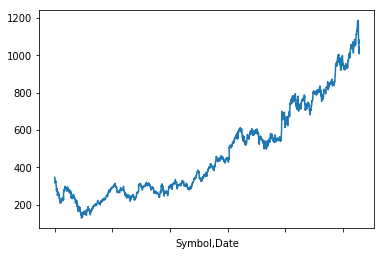

In [5]:
close = df['Close']
close.plot()

# 投資報酬率

$ 
\frac{P_t - P_{t - 1}}{P_{t - 1}} 
$

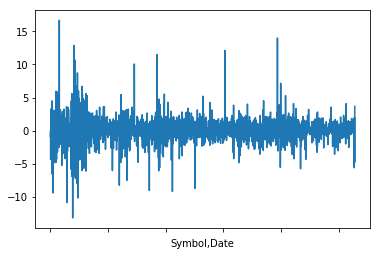

In [6]:
return_rate = (close.diff() / close) * 100
return_rate.plot()

# 移動平均

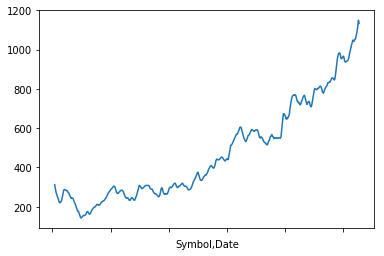

In [7]:
rolling_20 = close.rolling(window = 20).mean()
rolling_20.plot()

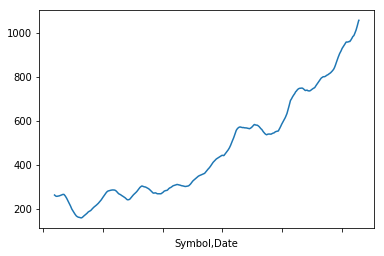

In [12]:
rolling_100 = close.rolling(window = 100).mean()
rolling_100.plot()

# 股價比較

In [13]:
start = datetime.datetime(2018, 1, 1)
end = datetime.datetime.now()
apple = web.DataReader('AAPL', 'morningstar', start, end)['Close']
amazon = web.DataReader('AMZN', 'morningstar', start, end)['Close']
facebook = web.DataReader('FB', 'morningstar', start, end)['Close']
microsoft = web.DataReader('MSFT', 'morningstar', start, end)['Close']
google = web.DataReader('GOOGL', 'morningstar', start, end)['Close']

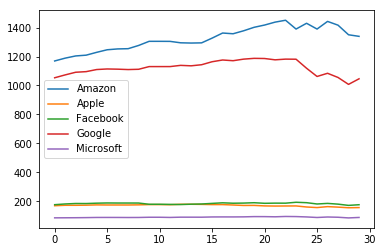

In [14]:
apple_price = apple.tolist()
amazon_price = amazon.tolist()
facebook_price = facebook.tolist()
microsoft_price = microsoft.tolist()
google_price = google.tolist()
price = pd.DataFrame({'Apple': apple_price, 'Amazon': amazon_price, 'Facebook': facebook_price, 'Microsoft': microsoft_price, 'Google': google_price})
price.plot()

# 報酬率比較

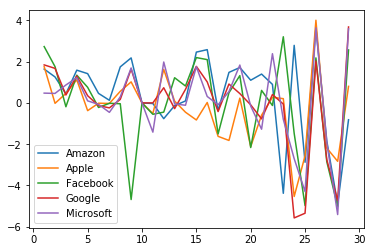

In [15]:
apple_rate = ((apple.diff() / apple) * 100).tolist()
amazon_rate = ((amazon.diff() / amazon) * 100).tolist()
facebook_rate = ((facebook.diff() / facebook) * 100).tolist()
microsoft_rate = ((microsoft.diff() / microsoft) * 100).tolist()
google_rate = ((google.diff() / google) * 100).tolist()
return_rate = pd.DataFrame({'Apple': apple_rate, 'Amazon': amazon_rate, 'Facebook': facebook_rate, 'Microsoft': microsoft_rate, 'Google': google_rate})
return_rate.plot()